***Data Source:*** *https://www.kaggle.com/c/aptos2019-blindness-detection/overview*

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14774/875431/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1631327858&Signature=QBf%2BktYNnoqZbHHj5lnP2tnvrDfpxhrtr%2F3NyTA%2Bf%2Frnui0YF49aU06SRrMtFECP2dWN8CYgauX%2ByEq7G5VvyXN95SLnT7uB%2BZ9h%2B6AWeBTjFlLJ%2FiMDz14iu5mcKLLQNTQeIJV8mxlJkQlN0vIZX5E0RfAvDtIlX4odA776mVdrpkvNQRTNA2Q5B7inHI7wpLI7GKS2Q3vikUv%2BbZEt6FS0W1lwEF93S4vG3%2BShwqnZP5ASeuS5NlyqXmMoP9L5rImNDEGwVW49ngCSWeVSUlDa%2F%2BBNgeN9KBW68K0vAx4qgozH3A%2Bd0KYSirUhLRgJnd8CjyFup9BuRkzrc5b8Uw%3D%3D&response-content-disposition=attachment%3B+filename%3Daptos2019-blindness-detection.zip" -c -O 'aptos2019-blindness-detection.zip'

--2021-09-09 23:17:58--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14774/875431/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1631327858&Signature=QBf%2BktYNnoqZbHHj5lnP2tnvrDfpxhrtr%2F3NyTA%2Bf%2Frnui0YF49aU06SRrMtFECP2dWN8CYgauX%2ByEq7G5VvyXN95SLnT7uB%2BZ9h%2B6AWeBTjFlLJ%2FiMDz14iu5mcKLLQNTQeIJV8mxlJkQlN0vIZX5E0RfAvDtIlX4odA776mVdrpkvNQRTNA2Q5B7inHI7wpLI7GKS2Q3vikUv%2BbZEt6FS0W1lwEF93S4vG3%2BShwqnZP5ASeuS5NlyqXmMoP9L5rImNDEGwVW49ngCSWeVSUlDa%2F%2BBNgeN9KBW68K0vAx4qgozH3A%2Bd0KYSirUhLRgJnd8CjyFup9BuRkzrc5b8Uw%3D%3D&response-content-disposition=attachment%3B+filename%3Daptos2019-blindness-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 172.217.13.80, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10215289875 (9.5G) [application/zip]
Saving to: ‘aptos2019-b

In [2]:
!unzip aptos2019-blindness-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/5400549bfe76.png  
  inflating: test_images/

*Importing few libraries*

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

*Reading the CSV file*

In [4]:
train = pd.read_csv('train.csv')
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


*Inspecting the number of classes*

In [5]:
np.unique(train['diagnosis'])

array([0, 1, 2, 3, 4])

*Inspecting the Nulls*

In [6]:
train.isnull().sum()

id_code      0
diagnosis    0
dtype: int64

*Total Images in the Train data*

In [7]:
len(train)

3662

## ***Exploratory Data Analysis***

*Plotting the count and the percentage of the Target Variable (Diagnosis)*

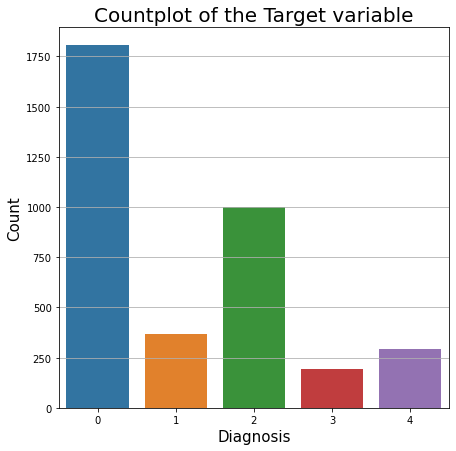

In [8]:
plt.figure(figsize = (7, 7))
plt.title('Countplot of the Target variable', fontsize = 20)
plt.grid()
sns.countplot(train['diagnosis'])
plt.xlabel('Diagnosis', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

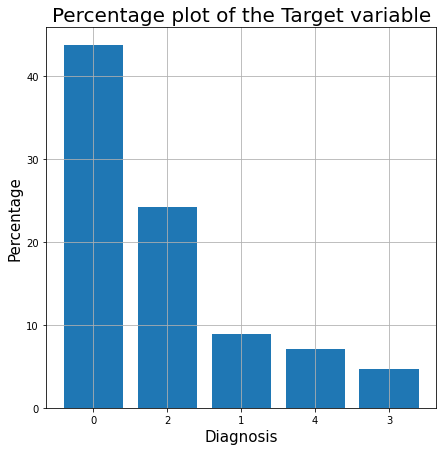

In [9]:
x = pd.DataFrame(100*(train['diagnosis'].value_counts()/sum(train['diagnosis'])))
x['label'] = ['0', '2', '1', '4', '3']
plt.figure(figsize = (7, 7))
plt.title('Percentage plot of the Target variable', fontsize = 20)
plt.grid()
plt.bar(height = x['diagnosis'], x = x['label'])
plt.xlabel('Diagnosis', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.show()

*Plotting the distribution of Heights and Widths of the images*

In [10]:
import matplotlib.image as mpimg

file_info = {'Image' : [], 'Height' : [], 'Width' : []}
for i in train.values:
    img = mpimg.imread('train_images/' + i[0] + '.png')
    h = img.shape[0]
    w = img.shape[1]
    file_info['Image'].append(i[0] + '.png')
    file_info['Height'].append(h)
    file_info['Width'].append(w)

file_info = pd.DataFrame(file_info)
file_info.head()

,Image,Height,Width
0,000c1434d8d7.png,2136,3216
1,001639a390f0.png,2136,3216
2,0024cdab0c1e.png,1736,2416
3,002c21358ce6.png,1050,1050
4,005b95c28852.png,1536,2048


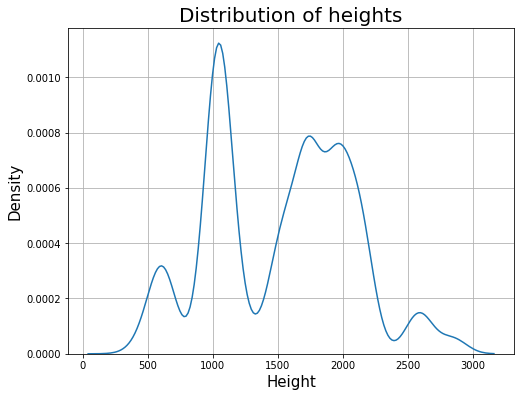

In [11]:
plt.figure(figsize = (8, 6))
plt.grid()
plt.title('Distribution of heights', fontsize = 20)
sns.distplot(file_info['Height'], hist = False)
plt.xlabel('Height', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show()

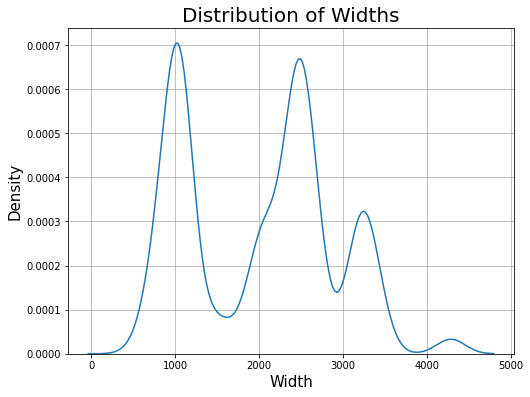

In [12]:
plt.figure(figsize = (8, 6))
plt.grid()
plt.title('Distribution of Widths', fontsize = 20)
sns.distplot(file_info['Width'], hist = False)
plt.xlabel('Width', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.show()

*Separating the data into train and validation directories*

In [13]:
os.mkdir('data')

os.mkdir('data/train')
os.mkdir('data/train/0')
os.mkdir('data/train/1')
os.mkdir('data/train/2')
os.mkdir('data/train/3')
os.mkdir('data/train/4')

os.mkdir('data/validation')
os.mkdir('data/validation/0')
os.mkdir('data/validation/1')
os.mkdir('data/validation/2')
os.mkdir('data/validation/3')
os.mkdir('data/validation/4')

from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size = 0.15,
                              random_state = 42, 
                              stratify = train['diagnosis'])

import shutil

for i in train.values:
    if i[-1] == 0:
        shutil.move('train_images/' + i[0] + '.png', 'data/train/0')
    elif i[-1] == 1:
        shutil.move('train_images/' + i[0] + '.png', 'data/train/1')
    elif i[-1] == 2:
        shutil.move('train_images/' + i[0] + '.png', 'data/train/2')
    elif i[-1] == 3:
        shutil.move('train_images/' + i[0] + '.png', 'data/train/3')
    elif i[-1] == 4:
        shutil.move('train_images/' + i[0] + '.png', 'data/train/4')

for i in val.values:
    if i[-1] == 0:
        shutil.move('train_images/' + i[0] + '.png', 'data/validation/0')
    elif i[-1] == 1:
        shutil.move('train_images/' + i[0] + '.png', 'data/validation/1')
    elif i[-1] == 2:
        shutil.move('train_images/' + i[0] + '.png', 'data/validation/2')
    elif i[-1] == 3:
        shutil.move('train_images/' + i[0] + '.png', 'data/validation/3')
    elif i[-1] == 4:
        shutil.move('train_images/' + i[0] + '.png', 'data/validation/4')  

*Data Generators*

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(horizontal_flip = True, 
                                     vertical_flip = True, 
                                     rotation_range = 20,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2, 
                                     zoom_range = 0.2)

train_generator = image_generator.flow_from_directory(directory = 'data/train',
                                                      target_size = (128, 128),
                                                      batch_size = 128,
                                                      shuffle = True,
                                                      class_mode = 'categorical',
                                                      seed = 42)

val_generator = image_generator.flow_from_directory(directory = 'data/validation',
                                                    target_size = (128, 128),
                                                    batch_size = 128,
                                                    shuffle = True,
                                                    class_mode = 'categorical',
                                                    seed = 42)

Found 3112 images belonging to 5 classes.
Found 550 images belonging to 5 classes.


## ***Model Building***

*1. Using VGGNet*

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import *
from tensorflow.keras import Model
import tensorflow

callbacks = [tensorflow.keras.callbacks.ModelCheckpoint(filepath = 'model.h5', save_best_only = True),
             tensorflow.keras.callbacks.ReduceLROnPlateau(monitor = 'accuracy', factor = 0.1, 
                                                          patience = 2, mode = 'auto')]

vgg_model = VGG16(include_top = False, input_shape = (128, 128, 3), weights = 'imagenet')
for layer in vgg_model.layers:
    layer.trainable = False

flat_1 = Flatten()(vgg_model.layers[-1].output)

dense_1 = Dense(512, activation = 'relu', kernel_initializer = 'he_normal')(flat_1)
batch_1 = BatchNormalization()(dense_1)
dropout_1 = Dropout(0.3)(batch_1)

output = Dense(5, activation = 'softmax', kernel_initializer = 'he_normal')(dropout_1)

model_vggnet = Model(inputs = vgg_model.inputs, outputs = output)

model_vggnet.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

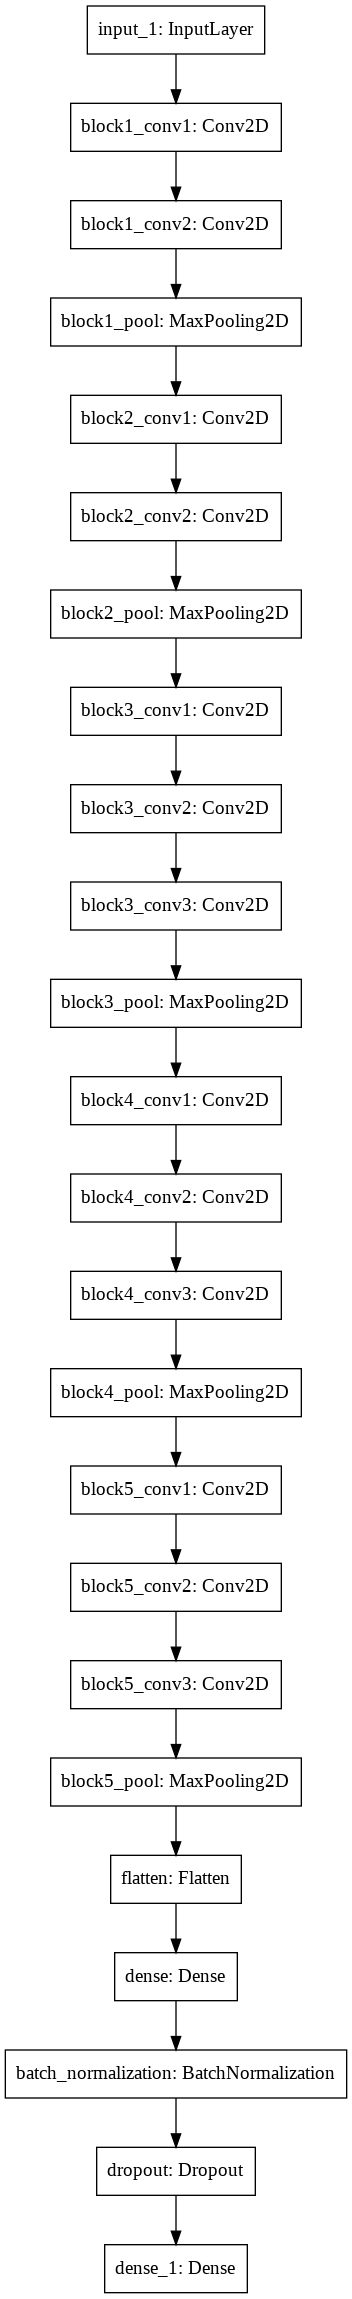

In [ ]:
tensorflow.keras.utils.plot_model(model_vggnet)

In [ ]:
model_vggnet.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history_vggnet = model_vggnet.fit_generator(train_generator, validation_data = val_generator, epochs = 15, callbacks = callbacks)

Epoch 1/15
25/25 [==============================] - 531s 20s/step - loss: 1.3244 - accuracy: 0.6224 - val_loss: 3.2579 - val_accuracy: 0.6000
Epoch 2/15
25/25 [==============================] - 477s 19s/step - loss: 0.8977 - accuracy: 0.6889 - val_loss: 1.3902 - val_accuracy: 0.6618
Epoch 3/15
25/25 [==============================] - 481s 20s/step - loss: 0.7960 - accuracy: 0.7102 - val_loss: 1.1179 - val_accuracy: 0.6673
Epoch 4/15
25/25 [==============================] - 485s 20s/step - loss: 0.7460 - accuracy: 0.7320 - val_loss: 0.9334 - val_accuracy: 0.7018
Epoch 5/15
25/25 [==============================] - 489s 20s/step - loss: 0.7146 - accuracy: 0.7400 - val_loss: 0.8519 - val_accuracy: 0.7255
Epoch 6/15
25/25 [==============================] - 484s 20s/step - loss: 0.6982 - accuracy: 0.7404 - val_loss: 0.8048 - val_accuracy: 0.7400
Epoch 7/15
25/25 [==============================] - 482s 19s/step - loss: 0.6935 - accuracy: 0.7397 - val_loss: 0.8217 - val_accuracy: 0.7309
Epoch 

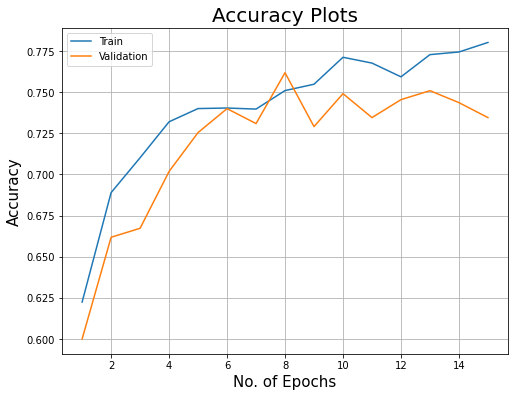

In [ ]:
plt.figure(figsize= (8, 6))
plt.grid()
plt.title('Accuracy Plots', fontsize = 20)
plt.plot(range(1, 16), history_vggnet.history['accuracy'])
plt.plot(range(1, 16), history_vggnet.history['val_accuracy'])
plt.xlabel('No. of Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(['Train', 'Validation'])
plt.show()

*2. Using ResNet*

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet_model = ResNet50(include_top = False, input_shape = (128, 128, 3), weights = 'imagenet')
for layer in resnet_model.layers:
    layer.trainable = False

flat_1 = Flatten()(resnet_model.layers[-1].output)

dense_1 = Dense(512, activation = 'relu', kernel_initializer = 'he_normal')(flat_1)
batch_1 = BatchNormalization()(dense_1)
dropout_1 = Dropout(0.3)(batch_1)

output = Dense(5, activation = 'softmax', kernel_initializer = 'he_normal')(dropout_1)

model_resnet = Model(inputs = resnet_model.inputs, outputs = output)

model_resnet.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________

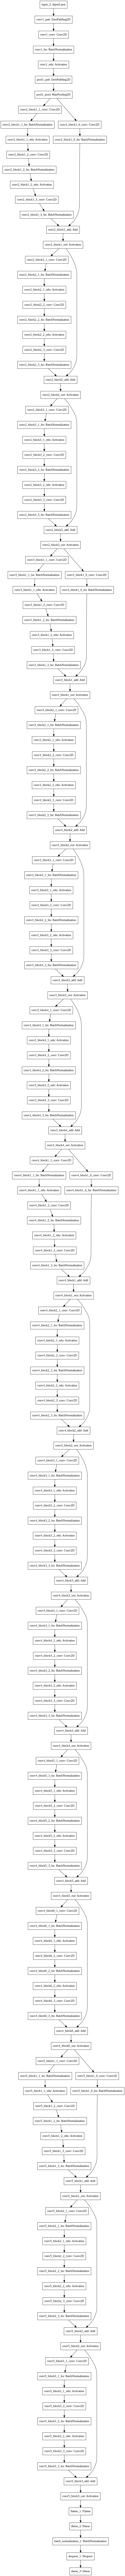

In [ ]:
tensorflow.keras.utils.plot_model(model_resnet)

In [ ]:
model_resnet.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history_resnet = model_resnet.fit_generator(train_generator, validation_data = val_generator, epochs = 8, callbacks = callbacks)

Epoch 1/8
25/25 [==============================] - 509s 20s/step - loss: 1.5233 - accuracy: 0.6189 - val_loss: 2.1779 - val_accuracy: 0.6855
Epoch 2/8
25/25 [==============================] - 481s 19s/step - loss: 0.9284 - accuracy: 0.6928 - val_loss: 1.2191 - val_accuracy: 0.7109
Epoch 3/8
25/25 [==============================] - 485s 20s/step - loss: 0.8000 - accuracy: 0.7233 - val_loss: 0.9749 - val_accuracy: 0.7200
Epoch 4/8
25/25 [==============================] - 487s 20s/step - loss: 0.7406 - accuracy: 0.7275 - val_loss: 0.9244 - val_accuracy: 0.7273
Epoch 5/8
25/25 [==============================] - 483s 19s/step - loss: 0.7402 - accuracy: 0.7365 - val_loss: 0.8858 - val_accuracy: 0.7145
Epoch 6/8
25/25 [==============================] - 485s 20s/step - loss: 0.6876 - accuracy: 0.7436 - val_loss: 0.9335 - val_accuracy: 0.6891
Epoch 7/8
25/25 [==============================] - 485s 20s/step - loss: 0.6836 - accuracy: 0.7497 - val_loss: 0.7511 - val_accuracy: 0.7400
Epoch 8/8
25/

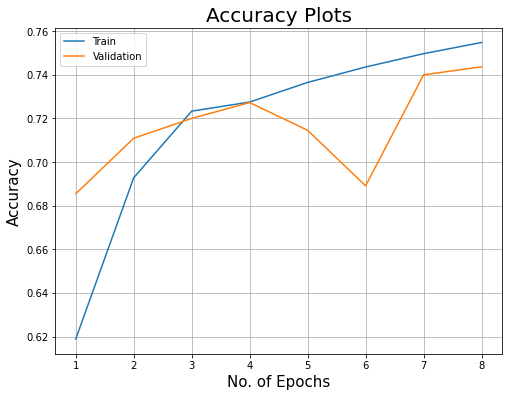

In [ ]:
plt.figure(figsize= (8, 6))
plt.grid()
plt.title('Accuracy Plots', fontsize = 20)
plt.plot(range(1, 9), history_resnet.history['accuracy'])
plt.plot(range(1, 9), history_resnet.history['val_accuracy'])
plt.xlabel('No. of Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(['Train', 'Validation'])
plt.show()

***Conclusion:***
>*Both the models have performed almost the same. If we go into details then we can say VGGNet has an edge over ResNet but at the same time we can say ResNet has generalized comparatively better after the 4th epoch.*

*3. Using the combination of VGGNet and ResNet*

In [17]:
resnet_model_1 = ResNet50(include_top = False, input_shape = (128, 128, 3), weights = 'imagenet')
for layer in resnet_model_1.layers:
    layer.trainable = False

vggnet_model_1 = VGG16(include_top = False, input_shape = (128, 128, 3), weights = 'imagenet')
for layer in vggnet_model_1.layers:
    layer.trainable = False

resnet_output = Flatten()(resnet_model_1.layers[-1].output)
vggnet_output = Flatten()(vggnet_model_1.layers[-1].output)

combined = Concatenate()([resnet_output, vggnet_output])

dense_1 = Dense(512, activation = 'relu', kernel_initializer = 'he_normal')(combined)
batch_1 = BatchNormalization()(dense_1)
dropout_1 = Dropout(0.5)(batch_1)

output = Dense(5, activation = 'softmax', kernel_initializer = 'he_normal')(dropout_1)

model_combined = Model(inputs = [resnet_model_1.inputs, vggnet_model_1.inputs], outputs = output)

model_combined.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_____________________________

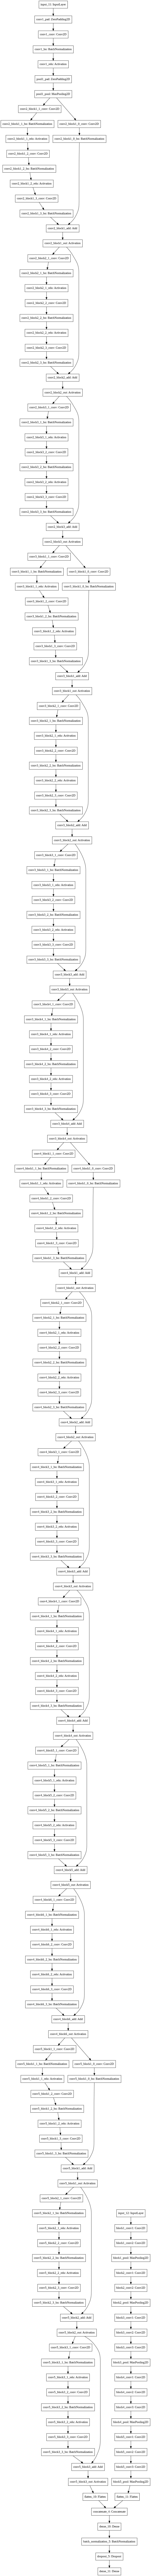

In [ ]:
tensorflow.keras.utils.plot_model(model_combined)

In [18]:
model_combined.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [19]:
def generator(gen):
    while True:
        for (x1, y1) in gen:
            yield [x1, x1], y1

In [22]:
history_model_combined = model_combined.fit_generator(generator(train_generator), validation_data = generator(val_generator), 
                                                      epochs = 8, steps_per_epoch = int(np.ceil(train.shape[0]/128)), 
                                                      validation_steps = int(np.ceil(val.shape[0]/128)), callbacks = callbacks)

Epoch 1/8
25/25 [==============================] - 1072s 43s/step - loss: 1.5815 - accuracy: 0.6125 - val_loss: 3.6687 - val_accuracy: 0.3782
Epoch 2/8
25/25 [==============================] - 1059s 43s/step - loss: 0.9404 - accuracy: 0.6883 - val_loss: 1.3854 - val_accuracy: 0.6509
Epoch 3/8
25/25 [==============================] - 1061s 43s/step - loss: 0.8758 - accuracy: 0.7053 - val_loss: 0.8534 - val_accuracy: 0.7200
Epoch 4/8
25/25 [==============================] - 1082s 44s/step - loss: 0.7915 - accuracy: 0.7285 - val_loss: 0.8418 - val_accuracy: 0.7200
Epoch 5/8
25/25 [==============================] - 1067s 43s/step - loss: 0.7352 - accuracy: 0.7381 - val_loss: 0.8956 - val_accuracy: 0.7145
Epoch 6/8
25/25 [==============================] - 1066s 43s/step - loss: 0.7231 - accuracy: 0.7455 - val_loss: 0.7921 - val_accuracy: 0.7491
Epoch 7/8
25/25 [==============================] - 1063s 43s/step - loss: 0.7001 - accuracy: 0.7577 - val_loss: 0.7270 - val_accuracy: 0.7582
Epoch 

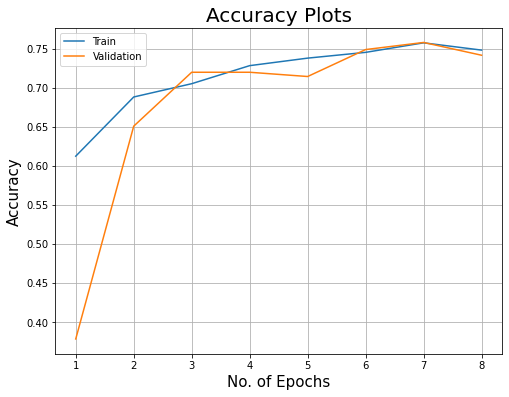

In [23]:
plt.figure(figsize= (8, 6))
plt.grid()
plt.title('Accuracy Plots', fontsize = 20)
plt.plot(range(1, 9), history_model_combined.history['accuracy'])
plt.plot(range(1, 9), history_model_combined.history['val_accuracy'])
plt.xlabel('No. of Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(['Train', 'Validation'])
plt.show()

*From the accuracy plots we can see that the **"Combined Model"** can actually perform better than both the previous models if we train the model for more epochs but we stopped at epoch 8th because of limited resources.*

***Plotting the metrics for Combined Model for Validation data***

*Making predictions*

In [73]:
from PIL import Image

path = 'data/validation'
data = {'Image' : [], 'Probabilities' : [], 'Predicted Label' : [], 'True Label' : []}
for i in os.listdir(path):
    img_folder = path + '/' + i
    for j in os.listdir(img_folder):
        img = Image.open(img_folder + '/' + j)
        img = np.array(img.resize((128, 128)))
        img = tf.expand_dims(img, axis = 0)
        pred_probs = model_combined.predict([img, img])
        label_pred = np.argmax(pred_probs, axis = 1)
        data['Image'].append(j)
        data['Probabilities'].append(list(pred_probs))
        data['Predicted Label'].append(label_pred)
        data['True Label'].append(int(i))

*Confusion Matrix*

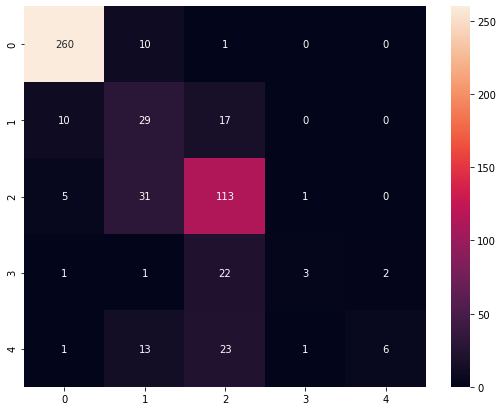

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(data['True Label'], data['Predicted Label'])
plt.figure(figsize = (9, 7))
sns.heatmap(cm, annot = True, fmt = 'g')
plt.show()

*Precision Matrix*

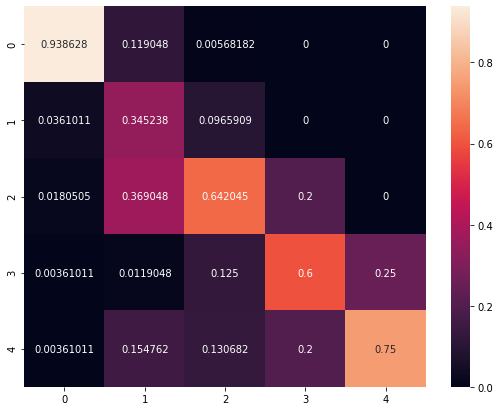

In [105]:
plt.figure(figsize = (9, 7))
sns.heatmap(cm/cm.sum(axis = 0), annot = True, fmt = 'g')
plt.show()

*Recall Matrix*

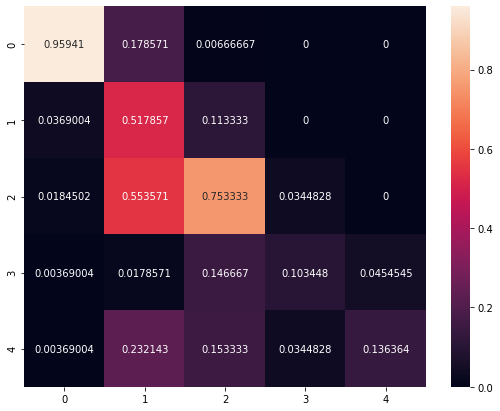

In [108]:
plt.figure(figsize = (9, 7))
sns.heatmap(cm/cm.sum(axis = 1), annot = True, fmt = 'g')
plt.show()

***Observation:***


>*We can see that for class 0 the model has generalized extremely well with both the Precision and the Recall being very high. For other classes the Precision is quite high but the Recall isn't up to the mark.*

